# Universidad de Buenos Aires
# Deep Learning - Examen

Descargar el dataset del siguiente link: https://drive.google.com/file/d/1X8_G5BpQMi-Nnbtms2RL8lcWSxzD8ixd/view?usp=sharing

El dataset son compras de productos que diferentes clientes realizaron durante el black sales.

El dataset contiene información sobre las transacciones y el objetivo es poder utilizar el dataset para crear diferentes modelos que puedan predecir cuanto un cliente está dispuesto a gastar en un producto en el futuro. Particularmente, vamos a tratar este problema como una clasificación binaria donde queremos averiguar si el cliente va a gatar mucha plata (más de 9000) o poca plata (menos de 9000).

Vamos a construir 4 modelos:

* Un modeo que siempre predice que los clientes gastan mucha plata en todos los productos.
* Un modelo del tipo de Regresión Logīstica. 
* Un modelo del tipo Random Forest.
* Un modelo del tipo Deep Learning sin embeddings.
* Un modelo del tipo Deep Learning con embeddings.

In [67]:
from google.colab import drive
import os
drive.mount('/content/drive')
os.chdir("/content/drive/My Drive/Colab Notebooks/")
!ls

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
'03 - Introducción a la clasificación con Keras'
'04 - Detección de anomalías con Keras'
'05 - Embeddings con Keras'
'06 - Autoencoders con Keras'
'07 - Integrador.ipynb'
'CV2 - 01 - Capas_convolucionales.ipynb'
'CV2 - 02 red_cnn_simple.ipynb'
'CV2 - 03 Modelo_convolucional_aplicacion_keras.ipynb'
 data
'Deep Learning - Clase 8 Examen.ipynb'
 desorden
'Machine Learning 1 - 8.1 Boosting.ipynb'
'Machine Learning 1 - 8.2 Bagging.ipynb'
 model_plot.png
 model.png
 models


In [196]:
import pandas as pd
import numpy as np
from scipy import stats
import matplotlib.pyplot as plt

import seaborn as sns
sns.set(style="ticks", color_codes=True, font_scale=1.5)

from sklearn import preprocessing
from sklearn.linear_model import LogisticRegression
from sklearn import metrics
from sklearn.ensemble import RandomForestClassifier

import tensorflow as tf
from tensorflow import keras

from keras.models import Sequential
from keras.layers import Dense
from keras.layers import Dropout
from keras.utils.vis_utils import plot_model

dataset = pd.read_csv('data/black_sales.csv')

# Análisis de datos

1. Imprimir las 5 primeros filas del dataset. 
2. Imprimir los tipos de cada columna del dataset.
3. Imprimir las estadísticas básicas de cada columnas. 
4. Hacer un histograma de la variable Purchase.
5. Que columnas son categóricas y cuales son numéricas?
6. Para las columnas categóricas, cuántas clases únicas tienen cada una?

In [206]:
dataset.head(5)

,User_ID,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase
0,1000001,P00069042,F,0-17,10,A,2,0,3,NaN,NaN,8370
1,1000001,P00248942,F,0-17,10,A,2,0,1,6.0,14.0,15200
2,1000001,P00087842,F,0-17,10,A,2,0,12,NaN,NaN,1422
3,1000001,P00085442,F,0-17,10,A,2,0,12,14.0,NaN,1057
4,1000002,P00285442,M,55+,16,C,4+,0,8,NaN,NaN,7969


In [78]:
dataset.dtypes

User_ID                         int64
Product_ID                     object
Gender                         object
Age                            object
Occupation                      int64
City_Category                  object
Stay_In_Current_City_Years     object
Marital_Status                  int64
Product_Category_1              int64
Product_Category_2            float64
Product_Category_3            float64
Purchase                        int64
dtype: object

In [79]:
dataset.describe()

,User_ID,Occupation,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase
count,5.500680e+05,550068.000000,550068.000000,550068.000000,376430.000000,166821.000000,550068.000000
mean,1.003029e+06,8.076707,0.409653,5.404270,9.842329,12.668243,9263.968713
std,1.727592e+03,6.522660,0.491770,3.936211,5.086590,4.125338,5023.065394
min,1.000001e+06,0.000000,0.000000,1.000000,2.000000,3.000000,12.000000
25%,1.001516e+06,2.000000,0.000000,1.000000,5.000000,9.000000,5823.000000
50%,1.003077e+06,7.000000,0.000000,5.000000,9.000000,14.000000,8047.000000
75%,1.004478e+06,14.000000,1.000000,8.000000,15.000000,16.000000,12054.000000
max,1.006040e+06,20.000000,1.000000,20.000000,18.000000,18.000000,23961.000000


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7fadbb6b39e8>]],
      dtype=object)

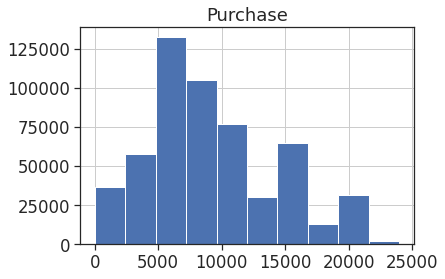

In [80]:
dataset.hist('Purchase')

In [109]:
categorical_fields = [
  "User_ID",
  "Product_ID",
  "Gender",
  "Age",
  "Occupation",
  "City_Category",
  "Stay_In_Current_City_Years",
  "Marital_Status",
  "Product_Category_1",
  "Product_Category_2",
  "Product_Category_3"
]

def list_categorical_fields(df,categorical_fields):
  for f in categorical_fields:
    print("Categoría: {}. Tipo: {} Valores únicos: {}".format(f, df[f].dtype, (np.unique(np.array(df[f])).shape)))

# FIXME. Debo limpiar los NaNs antes de hacer esto (por eso debo antes calcular dataset2)
list_categorical_fields(dataset2,categorical_fields) 

Categoría: User_ID. Tipo: int64 Valores únicos: (5891,)
Categoría: Product_ID. Tipo: object Valores únicos: (3631,)
Categoría: Gender. Tipo: object Valores únicos: (2,)
Categoría: Age. Tipo: object Valores únicos: (7,)
Categoría: Occupation. Tipo: int64 Valores únicos: (21,)
Categoría: City_Category. Tipo: object Valores únicos: (3,)
Categoría: Stay_In_Current_City_Years. Tipo: object Valores únicos: (5,)
Categoría: Marital_Status. Tipo: int64 Valores únicos: (2,)
Categoría: Product_Category_1. Tipo: int64 Valores únicos: (20,)
Categoría: Product_Category_2. Tipo: float64 Valores únicos: (18,)
Categoría: Product_Category_3. Tipo: float64 Valores únicos: (16,)


~~~
User_ID                         int64 Categórica
Product_ID                     object Categórica
Gender                         object Categórica
Age                            object Categórica (por rangos de edad)
Occupation                      int64 Categórica
City_Category                  object Categórica
Stay_In_Current_City_Years     object Categórica (por cantidades fijas o rangos)
Marital_Status                  int64 Categórica
Product_Category_1              int64 Categórica
Product_Category_2            float64 Numérica
Product_Category_3            float64 Numérica
Purchase                        int64 Numérica   (Monto)
dtype: object
~~~


# Limpieza de datos

1. Que columnas tienen NaNs?
2. Si la cantidad de filas afectas por NaNs es grande, se propone reemplazar los NaNs por una nueva clase, por ejemplo el valor 999. 


In [91]:
ds_with_nans = dataset.loc[dataset2.isna().sum(axis=1)>=1,:]
ds_without_nans = dataset.loc[dataset2.isna().sum(axis=1)==0,:]
print("Filas con NaNs:",ds_with_nans.shape)
print("Filas sin NaNs:",ds_without_nans.shape)

Filas con NaNs: (0, 13)
Filas sin NaNs: (550068, 13)


In [92]:
for f in categorical_fields:
    dataset2.loc[:,f].fillna(999, inplace=True)

ds_with_nans = dataset2.loc[dataset2.isna().sum(axis=1)>=1,:]
ds_without_nans = dataset2.loc[dataset2.isna().sum(axis=1)==0,:]
print("Filas con NaNs:",ds_with_nans.shape)
print("Filas sin NaNs:",ds_without_nans.shape)    

Filas con NaNs: (0, 13)
Filas sin NaNs: (550068, 13)


# Ingeniería de features

1. Transformar todas las variables categoricas (expecto User_Id y Product_id) en one-hot-encoding. 
2. Crear un index para User_Id y Product_id, para poder entrenar un modelo de Deep Learning con embeddings.
3. Porque es importante crear un index para entrenar el modelo de Deep Learning con embeddings?
4. Porque es importante guardar el mapping de id a index?
5. Transformar la variable Purchase en una variable purchase_binary, tal que todos los valores mayores a 9000 hagan un mapping a 1 y todos los valores menores o iguales a 9000 hagan un mapping a 0.
6. Normalizar todos los valores entre 0 y 1.
7. Hacer un split del dataset en training (70%), validation (20%) y testing (10%). Para crear el dataset de training se recomienda separar User_id y Product_id de la matriz x_train, x_valid y x_test. Pero también obtener user_idx_train, user_idx_valid y user_idex_test de tal manera que sea correspondientes con las matrices x. Lo mismo para el Product_Id. 

In [112]:
dataset_encoded = dataset2

Gender_dummies = pd.get_dummies(dataset_encoded.Gender,prefix='Gender')
dataset_encoded = pd.concat([dataset_encoded,Gender_dummies], axis=1)

Age_dummies = pd.get_dummies(dataset_encoded.Age,prefix='Age')
dataset_encoded = pd.concat([dataset_encoded,Age_dummies], axis=1)

Occupation_dummies = pd.get_dummies(dataset_encoded.Occupation,prefix='Occupation')
dataset_encoded = pd.concat([dataset_encoded,Occupation_dummies], axis=1)

City_Category_dummies = pd.get_dummies(dataset_encoded.City_Category,prefix='City_Category')
dataset_encoded = pd.concat([dataset_encoded,City_Category_dummies], axis=1)

Stay_In_Current_City_Years_dummies = pd.get_dummies(dataset_encoded.Stay_In_Current_City_Years,prefix='Stay_In_Current_City_Years')
dataset_encoded = pd.concat([dataset_encoded,Stay_In_Current_City_Years_dummies], axis=1)

Marital_Status_dummies = pd.get_dummies(dataset_encoded.Marital_Status,prefix='Marital_Status')
dataset_encoded = pd.concat([dataset_encoded,Marital_Status_dummies], axis=1)

Product_Category_1_dummies = pd.get_dummies(dataset_encoded.Product_Category_1,prefix='Product_Category_1')
dataset_encoded = pd.concat([dataset_encoded,Product_Category_1_dummies], axis=1)

Product_Category_2_dummies = pd.get_dummies(dataset_encoded.Product_Category_2,prefix='Product_Category_2')
dataset_encoded = pd.concat([dataset_encoded,Product_Category_2_dummies], axis=1)

Product_Category_3_dummies = pd.get_dummies(dataset_encoded.Product_Category_3,prefix='Product_Category_3')
dataset_encoded = pd.concat([dataset_encoded,Product_Category_3_dummies], axis=1)

print(dataset_encoded.info())
dataset_encoded

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 550068 entries, 0 to 550067
Columns: 107 entries, User_ID to Product_Category_3_999.0
dtypes: float64(2), int64(6), object(5), uint8(94)
memory usage: 103.9+ MB
None


,User_ID,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase,binary_purchase,Gender_F,Gender_M,Age_0-17,Age_18-25,Age_26-35,Age_36-45,Age_46-50,Age_51-55,Age_55+,Occupation_0,Occupation_1,Occupation_2,Occupation_3,Occupation_4,Occupation_5,Occupation_6,Occupation_7,Occupation_8,Occupation_9,Occupation_10,Occupation_11,Occupation_12,Occupation_13,Occupation_14,Occupation_15,Occupation_16,Occupation_17,...,Product_Category_1_15,Product_Category_1_16,Product_Category_1_17,Product_Category_1_18,Product_Category_1_19,Product_Category_1_20,Product_Category_2_2.0,Product_Category_2_3.0,Product_Category_2_4.0,Product_Category_2_5.0,Product_Category_2_6.0,Product_Category_2_7.0,Product_Category_2_8.0,Product_Category_2_9.0,Product_Category_2_10.0,Product_Category_2_11.0,Product_Category_2_12.0,Product_Category_2_13.0,Product_Category_2_14.0,Product_Category_2_15.0,Product_Category_2_16.0,Product_Category_2_17.0,Product_Category_2_18.0,Product_Category_2_999.0,Product_Category_3_3.0,Product_Category_3_4.0,Product_Category_3_5.0,Product_Category_3_6.0,Product_Category_3_8.0,Product_Category_3_9.0,Product_Category_3_10.0,Product_Category_3_11.0,Product_Category_3_12.0,Product_Category_3_13.0,Product_Category_3_14.0,Product_Category_3_15.0,Product_Category_3_16.0,Product_Category_3_17.0,Product_Category_3_18.0,Product_Category_3_999.0
0,1000001,P00069042,F,0-17,10,A,2,0,3,999.0,999.0,8370,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1
1,1000001,P00248942,F,0-17,10,A,2,0,1,6.0,14.0,15200,1,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0
2,1000001,P00087842,F,0-17,10,A,2,0,12,999.0,999.0,1422,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1
3,1000001,P00085442,F,0-17,10,A,2,0,12,14.0,999.0,1057,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1
4,1000002,P00285442,M,55+,16,C,4+,0,8,999.0,999.0,7969,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
550063,1006033,P00372445,M,51-55,13,B,1,1,20,999.0,999.0,368,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,...,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1
550064,1006035,P00375436,F,26-35,1,C,3,0,20,999.0,999.0,371,0,1,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1
550065,1006036,P00375436,F,26-35,15,B,4+,1,20,999.0,999.0,137,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,...,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1
550066,1006038,P00375436,F,55+,1,C,2,0,20,999.0,999.0,365,0,1,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1


Los identificadores de las variables categóricas de Usuario y Producto representan referencias (códigos, punteros o número de registros) del origen de datos. 
Es de interés para crear un embedding asignar a cada instancia única de un Usuario o Producto una representación en un espacio vectorial. Aún si no se utilizaran embeddings, el valor númerico del idenficador original es irrelevante, sólo importa que haga referncia a un elemento único. 
Se debe preservar la tabla de conversión de Id a índice porque cuando se utilice el modelo en producción los Ids que ingresen a la API utilizarán la codificación del origen de datos original.



In [172]:
final_dataset = dataset_encoded

User_Id = final_dataset['User_ID'].to_numpy()
Product_id = final_dataset['Product_ID'].to_numpy()

_, user_idx = np.unique(User_Id, return_inverse=True)
_, product_idx = np.unique(Product_id, return_inverse=True)

user_id2idx = { id:idx for id,idx in zip(User_Id,user_idx)}
product_id2idx = { id:idx for id,idx in zip(Product_id,product_idx)}

In [173]:
final_dataset['binary_purchase'] = final_dataset.Purchase.apply(lambda label: 0 if label <9000 else 1 )
print("Compras menores a $9000:", final_dataset[final_dataset['binary_purchase']==0].shape)
print("Compras superiores a $9000:", final_dataset[final_dataset['binary_purchase']==1].shape)

Compras menores a $9000: (330871, 107)
Compras superiores a $9000: (219197, 107)


In [174]:
final_dataset

,User_ID,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase,binary_purchase,Gender_F,Gender_M,Age_0-17,Age_18-25,Age_26-35,Age_36-45,Age_46-50,Age_51-55,Age_55+,Occupation_0,Occupation_1,Occupation_2,Occupation_3,Occupation_4,Occupation_5,Occupation_6,Occupation_7,Occupation_8,Occupation_9,Occupation_10,Occupation_11,Occupation_12,Occupation_13,Occupation_14,Occupation_15,Occupation_16,Occupation_17,...,Product_Category_1_15,Product_Category_1_16,Product_Category_1_17,Product_Category_1_18,Product_Category_1_19,Product_Category_1_20,Product_Category_2_2.0,Product_Category_2_3.0,Product_Category_2_4.0,Product_Category_2_5.0,Product_Category_2_6.0,Product_Category_2_7.0,Product_Category_2_8.0,Product_Category_2_9.0,Product_Category_2_10.0,Product_Category_2_11.0,Product_Category_2_12.0,Product_Category_2_13.0,Product_Category_2_14.0,Product_Category_2_15.0,Product_Category_2_16.0,Product_Category_2_17.0,Product_Category_2_18.0,Product_Category_2_999.0,Product_Category_3_3.0,Product_Category_3_4.0,Product_Category_3_5.0,Product_Category_3_6.0,Product_Category_3_8.0,Product_Category_3_9.0,Product_Category_3_10.0,Product_Category_3_11.0,Product_Category_3_12.0,Product_Category_3_13.0,Product_Category_3_14.0,Product_Category_3_15.0,Product_Category_3_16.0,Product_Category_3_17.0,Product_Category_3_18.0,Product_Category_3_999.0
0,1000001,P00069042,F,0-17,10,A,2,0,3,999.0,999.0,8370,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1
1,1000001,P00248942,F,0-17,10,A,2,0,1,6.0,14.0,15200,1,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0
2,1000001,P00087842,F,0-17,10,A,2,0,12,999.0,999.0,1422,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1
3,1000001,P00085442,F,0-17,10,A,2,0,12,14.0,999.0,1057,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1
4,1000002,P00285442,M,55+,16,C,4+,0,8,999.0,999.0,7969,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
550063,1006033,P00372445,M,51-55,13,B,1,1,20,999.0,999.0,368,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,...,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1
550064,1006035,P00375436,F,26-35,1,C,3,0,20,999.0,999.0,371,0,1,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1
550065,1006036,P00375436,F,26-35,15,B,4+,1,20,999.0,999.0,137,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,...,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1
550066,1006038,P00375436,F,55+,1,C,2,0,20,999.0,999.0,365,0,1,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1


In [175]:
final_dataset_2 = final_dataset.drop([
  'User_ID', 'Product_ID', 'Age','Gender','Occupation','Marital_Status',
  'City_Category','Stay_In_Current_City_Years',
  'Product_Category_1','Product_Category_2','Product_Category_3',
  'Purchase'
  ], axis=1, inplace=False)
final_dataset_2.dtypes

binary_purchase             int64
Gender_F                    uint8
Gender_M                    uint8
Age_0-17                    uint8
Age_18-25                   uint8
                            ...  
Product_Category_3_15.0     uint8
Product_Category_3_16.0     uint8
Product_Category_3_17.0     uint8
Product_Category_3_18.0     uint8
Product_Category_3_999.0    uint8
Length: 95, dtype: object

In [176]:
"""
Hacer un split del dataset en training (70%), validation (20%) y testing (10%). 
Para crear el dataset de training se recomienda separar User_id y 
Product_id de la matriz x_train, x_valid y x_test. Pero también obtener 
user_idx_train, user_idx_valid y user_idex_test de tal manera que sea 
correspondientes con las matrices x. Lo mismo para el Product_Id.
"""
n_samples = final_dataset_2.shape[0]

indexes = np.random.permutation(np.arange(0, n_samples))

train_idx = indexes[0:int(0.7*n_samples)]
validation_idx = indexes[int(0.7*n_samples): int(0.9*n_samples)]
test_idx = indexes[int(0.9*n_samples):]
assert n_samples == train_idx.size + validation_idx.size + test_idx.size

In [177]:
y = final_dataset_2.binary_purchase

final_dataset_without_y = final_dataset_2.drop(['binary_purchase'], axis=1, inplace=False)

x_train = final_dataset_without_y.iloc[train_idx,:]
user_idx_train = user_idx[train_idx]
product_idx_train = product_idx[train_idx]
y_train = y.iloc[train_idx].to_numpy()

x_validation = final_dataset_without_y.iloc[validation_idx,:]
user_idx_validation = user_idx[validation_idx]
product_idx_validation = product_idx[validation_idx]
y_validation = y.iloc[validation_idx].to_numpy()

x_test = final_dataset_without_y.iloc[test_idx, :]
user_idx_test = user_idx[test_idx]
product_idx_test = product_idx[test_idx]
y_test = y.iloc[test_idx].to_numpy()

In [178]:
# normalizar los datos para que vayan entre 0 y 1
min_max_scaler = preprocessing.MinMaxScaler()

x_train_norm = min_max_scaler.fit_transform(x_train)
x_validation_norm = min_max_scaler.fit_transform(x_validation)
x_test_norm = min_max_scaler.fit_transform(x_test)

print(x_train_norm.min())
print(x_train_norm.max())

0.0
1.0


In [186]:
print("X_train.shape:",x_train_norm.shape)
print("x_validation_norm.shape:",x_validation_norm.shape)
print("x_test_norm.shape:",x_test_norm.shape)
print("y_train.shape:",y_train.shape)
print("y_validation_norm.shape:",y_validation.shape)
print("y_test_norm.shape:",y_test.shape)

X_train.shape: (385047, 94)
x_validation_norm.shape: (110014, 94)
x_test_norm.shape: (55007, 94)
y_train.shape: (385047,)
y_validation_norm.shape: (110014,)
y_test_norm.shape: (55007,)


#Modelo base

1. Entrenar un modelo base que siempre de como predicción que el purchase del cliente es de valor elevado.
2. Calcular el AUC de este modelo.
3. Porque es importante siempre definir un modelo base?

In [199]:
class BaseModel(object):
  def fit(self,X,y):
    return None
  def predict(self,X):
    prediction = np.ones(shape=X.shape[0])
    return prediction

base_model = BaseModel()
base_model.fit(x_train_norm,y_train)
bm_predictions = base_model.predict(x_validation_norm)

fpr,tpr,thresholds = metrics.roc_curve(y_validation,bm_predictions)
print(metrics.auc(fpr,tpr))

0.5


Definimos un modelo base para siempre comparar los sucesivos modelos respecto a una predicción aleatoria o arbitraria, que representa el no tomar ninguna decisión sobre los datos. Se espera que los sucesivos modelos, como mínimo, mejoren las métricas del modelo base.

# Regresión logísica

1. Entrenar un modelo de regresión logística que sea mejor que el modelo base (no usar User_Id y Product_Id). 
2. Porque es importante normalizar los datos antes de entrenar el modelo de regresión logística?
3. Porque es importante utilizar una metrica como AUC en un problema de clasificación binaria?

In [200]:
lr_model = LogisticRegression(C=1, solver="sag", max_iter=1000)
lr_model.fit(x_train_norm,y_train)

lr_predictions = lr_model.predict(x_validation_norm)

fpr,tpr,thresholds = metrics.roc_curve(y_validation,lr_predictions)
print(metrics.auc(fpr,tpr))

0.8654336185453628


En regresión logística se deben normalizar los datos para escalar las features de entrada y para facilitar la convergencia.

El objetivo de usar la métrica AUC (Área bajo la Curva) en este y otros clasificadores, es evaluar el modelo de manera independiente del umbral de discriminación entre una clase y otra).

# Random forest

1. Entrenar un modelo de Random Forest que sea mejor que el modelo base (no usar User_Id y Product_Id).

In [201]:
rf_model = RandomForestClassifier(n_estimators=100,max_depth=3,random_state=0)
rf_model.fit(x_train,y_train)

rf_predictions = rf_model.predict(x_validation)

fpr,tpr,thresholds = metrics.roc_curve(y_validation,rf_predictions)
print(metrics.auc(fpr,tpr))

0.7929506154867139


# Deep learning sin embeddings

1. Entrenar un modelo de Deep Learning que no utilice embeddings (no usar User_Id y Product_Id).

In [222]:
# hidden layer de 100 neuronas
# como seria el layer de salida?
def create_model():
  # create model
  model = tf.keras.models.Sequential()
  model.add(tf.keras.layers.Dense(100,activation='relu'))
  model.add(tf.keras.layers.Dense(1,activation='sigmoid'))
  return model

model1 = create_model()

model_metrics = [
    tf.keras.metrics.AUC()
]

model1.compile(
    optimizer=tf.keras.optimizers.Adam(learning_rate=0.01),
    loss='binary_crossentropy',
    metrics=model_metrics
)

history1 = model1.fit(
    x_train_norm.astype(np.float32), 
    y_train.astype(np.float32),
    epochs=10,
    batch_size=64,
    validation_data=(x_validation_norm, y_validation),
)

Epoch 1/10
6017/6017 [==============================] - 11s 2ms/step - loss: 0.3154 - auc_3: 0.9267 - val_loss: 0.3092 - val_auc_3: 0.9301
Epoch 2/10
6017/6017 [==============================] - 10s 2ms/step - loss: 0.3099 - auc_3: 0.9301 - val_loss: 0.3098 - val_auc_3: 0.9312
Epoch 3/10
6017/6017 [==============================] - 10s 2ms/step - loss: 0.3077 - auc_3: 0.9315 - val_loss: 0.3091 - val_auc_3: 0.9319
Epoch 4/10
6017/6017 [==============================] - 10s 2ms/step - loss: 0.3065 - auc_3: 0.9324 - val_loss: 0.3055 - val_auc_3: 0.9328
Epoch 5/10
6017/6017 [==============================] - 11s 2ms/step - loss: 0.3059 - auc_3: 0.9327 - val_loss: 0.3053 - val_auc_3: 0.9332
Epoch 6/10
6017/6017 [==============================] - 10s 2ms/step - loss: 0.3053 - auc_3: 0.9331 - val_loss: 0.3044 - val_auc_3: 0.9336
Epoch 7/10
6017/6017 [==============================] - 10s 2ms/step - loss: 0.3050 - auc_3: 0.9333 - val_loss: 0.3043 - val_auc_3: 0.9333
Epoch 8/10
6017/6017 [=====

In [235]:
from plotly.subplots import make_subplots
import plotly.graph_objects as go

def plot_all(history,loss_metric,perf_metric):
  fig1 = go.Figure()
  fig1.add_trace(go.Scattergl(y=history.history[perf_metric], name='Train'))
  fig1.add_trace(go.Scattergl(y=history.history['val_'+perf_metric], name='Valid'))
  fig1.update_layout(height=300, width=400,xaxis_title='Epoch', yaxis_title='AUC')

  fig2 = go.Figure()
  fig2.add_trace(go.Scattergl(y=history.history[loss_metric], name='Train'))
  fig2.add_trace(go.Scattergl(y=history.history['val_'+loss_metric], name='Valid'))
  fig2.update_layout(height=300, width=400,xaxis_title='Epoch', yaxis_title='Loss')

  return [fig1,fig2]

fig1,fig2=plot_all(history1,loss_metric='loss',perf_metric="auc_3")
fig1.show()
fig2.show()

# Deep learning con embeddings

1. Entrenar un model de Deep Learning que utilice embeddings de los usuarios y los productos.

In [207]:
x_train.dtypes

Gender_F                    uint8
Gender_M                    uint8
Age_0-17                    uint8
Age_18-25                   uint8
Age_26-35                   uint8
                            ...  
Product_Category_3_15.0     uint8
Product_Category_3_16.0     uint8
Product_Category_3_17.0     uint8
Product_Category_3_18.0     uint8
Product_Category_3_999.0    uint8
Length: 94, dtype: object

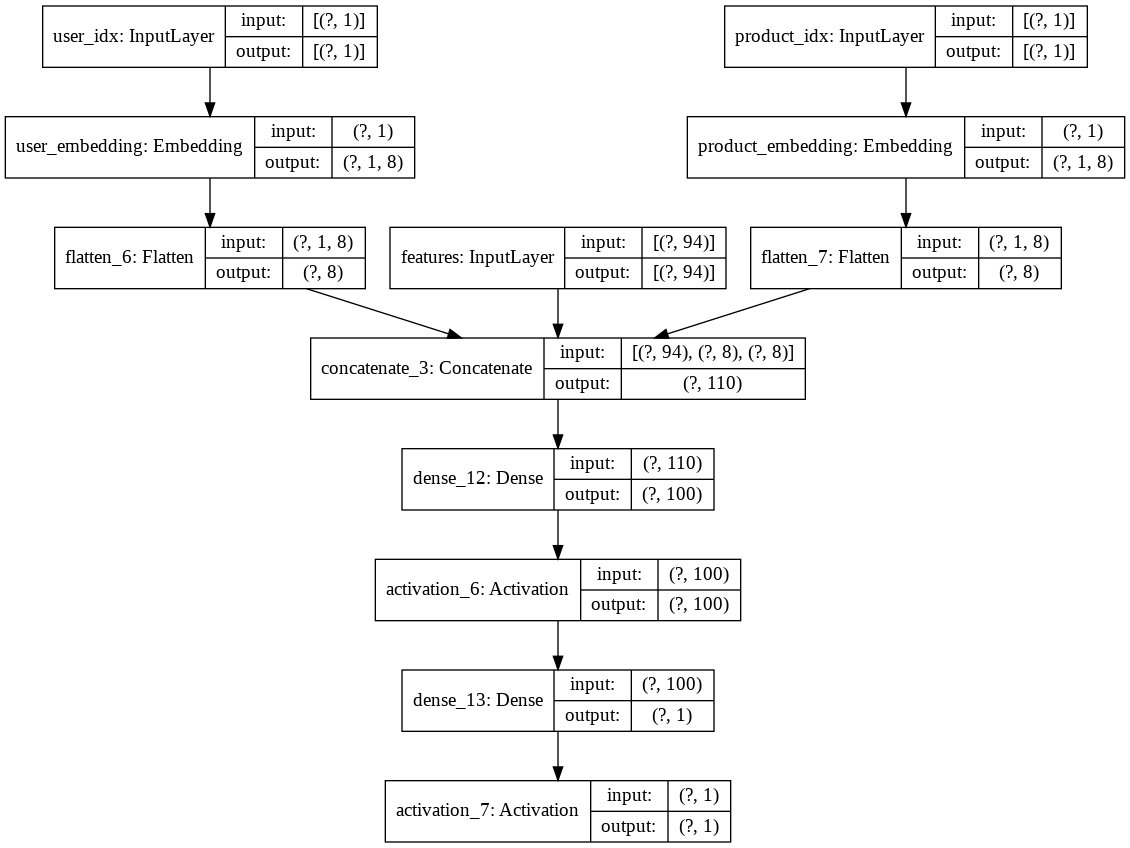

In [238]:
def create_model_with_embeddings():
  features_input= tf.keras.Input(shape=(94,), name='features')
  
  user_idx_input = tf.keras.Input(shape=(1,), name='user_idx')
  product_idx_input = tf.keras.Input(shape=(1,), name='product_idx')
  
  user_embedding = tf.keras.layers.Embedding(user_idx.max()+1,8,input_length=1,name="user_embedding")(user_idx_input)  
  user_embedding = tf.keras.layers.Flatten()(user_embedding)

  product_embedding = tf.keras.layers.Embedding(product_idx.max()+1,8,input_length=1,name="product_embedding")(product_idx_input)  
  product_embedding = tf.keras.layers.Flatten()(product_embedding)

  concatenated = tf.keras.layers.Concatenate()([features_input,user_embedding,product_embedding])

  out = tf.keras.layers.Dense(100)(concatenated)
  out = tf.keras.layers.Activation('relu')(out)
  out = tf.keras.layers.Dense(1)(out)
  out = tf.keras.layers.Activation('sigmoid')(out)

  model = tf.keras.Model(
      inputs = [features_input,user_idx_input,product_idx_input],
      outputs = out,
  )
  return model

model2 = create_model_with_embeddings()

model_metrics = [
    tf.keras.metrics.AUC()
]

model2.compile(
    optimizer=tf.keras.optimizers.Adam(learning_rate=0.01),
    loss='binary_crossentropy',
    metrics=model_metrics
)

plot_model(model2,to_file="model_plot.png",show_shapes=True,show_layer_names=True)

In [239]:
history2 = model2.fit(
    [ x_train_norm.astype(np.float32),
      user_idx_train.astype(np.float32),
      product_idx_train.astype(np.float32) ],
    y_train.astype(np.float32),
    epochs=10,
    batch_size=16,
    validation_data=[
      [ x_validation_norm,user_idx_validation,product_idx_validation],
      y_validation
      ]
)

Epoch 1/10
24066/24066 [==============================] - 47s 2ms/step - loss: 0.2767 - auc_4: 0.9484 - val_loss: 0.0000e+00 - val_auc_4: 0.0000e+00
Epoch 2/10
24066/24066 [==============================] - 46s 2ms/step - loss: 0.2582 - auc_4: 0.9557 - val_loss: 0.0000e+00 - val_auc_4: 0.0000e+00
Epoch 3/10
24066/24066 [==============================] - 46s 2ms/step - loss: 0.2532 - auc_4: 0.9577 - val_loss: 0.0000e+00 - val_auc_4: 0.0000e+00
Epoch 4/10
24066/24066 [==============================] - 46s 2ms/step - loss: 0.2504 - auc_4: 0.9587 - val_loss: 0.0000e+00 - val_auc_4: 0.0000e+00
Epoch 5/10
24066/24066 [==============================] - 46s 2ms/step - loss: 0.2481 - auc_4: 0.9593 - val_loss: 0.0000e+00 - val_auc_4: 0.0000e+00
Epoch 6/10
24066/24066 [==============================] - 46s 2ms/step - loss: 0.2478 - auc_4: 0.9595 - val_loss: 0.0000e+00 - val_auc_4: 0.0000e+00
Epoch 7/10
24066/24066 [==============================] - 49s 2ms/step - loss: 0.2467 - auc_4: 0.9600 - va

In [240]:
history2.history

{'auc_4': [0.9484308362007141,
  0.9557428359985352,
  0.9577365517616272,
  0.9586544632911682,
  0.9592581391334534,
  0.9595363736152649,
  0.9599591493606567,
  0.9600322246551514,
  0.9602320790290833,
  0.9602627158164978],
 'loss': [0.2767255902290344,
  0.25818192958831787,
  0.2531566023826599,
  0.25041985511779785,
  0.24805136024951935,
  0.24784205853939056,
  0.24673832952976227,
  0.24663382768630981,
  0.2458047866821289,
  0.2454816848039627],
 'val_auc_4': [0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0],
 'val_loss': [0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0]}

In [242]:
fig1,fig2=plot_all(history2,loss_metric='loss',perf_metric="auc_4")
fig1.show()
fig2.show()
# Ver qué pasó acá, las predicciones más abajo parecen dar bien

3) Cómo podrían usar este clasificador que armaron para hacer un ranking de que productos recomendar a cada usuario ?  (editado) 
Podrían armar el ranking de productos a recomendar para cada user id?

R: Se podría utilizar la información de ambos embeddings para encontrar clusters de productos afines y usuarios afines (con poca distancia entre puntos de su espacio de representación). Esto permitiría por ejemplo dado un producto, identificar qué cluster de usuarios lo consume y buscar productos próximos en el embedding. EL ranking de productos sería de más próximos (mayor ranking) a más distantes (menor ranking)

# Comparación de los modelos

1. Comparar los resultados obtenidos.
2. Hacer el gráfico de la región de decison para cada modelo.

In [217]:
dl_model1_predictions = model1.predict(x_test_norm)
dl_model2_predictions = model2.predict([x_test_norm,user_idx_test,product_idx_test])

In [221]:
dl_model_results = {}
fpr,tpr,thresholds = metrics.roc_curve(y_test,dl_model1_predictions)
dl_model_results["model1"] = {
    "fpr": fpr,
    "tpr": tpr,
    "thresholds": thresholds
}
fpr,tpr,thresholds = metrics.roc_curve(y_test,dl_model2_predictions)
dl_model_results["model2"] = {
    "fpr": fpr,
    "tpr": tpr,
    "thresholds": thresholds
}
print("Model1 AUC:",metrics.auc(dl_model_results["model1"]["fpr"],dl_model_results["model1"]["tpr"]))
print("Model2 AUC:",metrics.auc(dl_model_results["model2"]["fpr"],dl_model_results["model2"]["tpr"]))

Model1 AUC: 0.9329089206396071
Model2 AUC: 0.9532290526464318


El segundo modelo con embeddings dá mejores resultados. Es posible que puedan mejorarse ambas métricas con hiperparámetros (no se hizo).

In [ ]:
# FIXME: TODO Decision Boundary